<a href="https://colab.research.google.com/github/yavuzlab/OMRChecker/blob/master/examples/Sort_Google_Scholar_No_Code_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sort Google Scholar - No Code Version


## 1. Type or Paste your search query bellow (including special Google Scholar rules like AND/OR or 'exact keyword')
For more keyword details, please refer to [this reference](https://guides.library.ucsc.edu/c.php?g=745384&p=5361954).



In [1]:
search_query = "machine learning" # @param {type:"string"}


Some examples:

- `Large Language Models` → General search
- `"Large Language Models"` → Exact phrase search
- `Large Language Models -transformer` → Exclude specific term
- `Large Language Models author:"Geoffrey Hinton"` → Search by author
- `Large Language Models source:Nature` → Search within a specific publication
- `("Large Language Models" OR "Transformer Models") AND (GPT OR BERT)` → Boolean search
- `intitle:"Large Language Models"` → Search in the title only


### Optional Parameters

In [2]:
# Expanded form with extra parameters
sortby = "cit/year"  # @param ["Citations", "cit/year"] {type:"string"}
nresults = 100  # @param {type:"number"}
startyear = "2015"  # @param {type:"string"}
endyear = "2025"  # @param {type:"string"}
langfilter = None  # @param ["None", "zh-CN", "zh-TW", "nl", "en", "fr", "de", "it", "ja", "ko", "pl", "pt", "es", "tr"] {type:"string"}

# Convert the langfilter to a list if it's not None
if langfilter and langfilter != "None":
    langfilter = [langfilter]
else:
    langfilter = None  # No language filter applied if "None" is selected

# Constructing the base command
cmd = f"sortgs '{search_query}' --sortby '{sortby}' --nresults {nresults}"

if startyear:
    cmd += f" --startyear {startyear}"

if endyear:
    cmd += f" --endyear {endyear}"

if langfilter:
    lang_str = ' '.join(langfilter)
    cmd += f" --langfilter {lang_str}"

# Output the constructed command for review
print("Constructed command:", cmd)


Constructed command: sortgs 'machine learning' --sortby 'cit/year' --nresults 100 --startyear 2015 --endyear 2025


# 2. Next, click in Runtime > Run All

In [3]:
# @title
!pip install sortgs --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
typeguard 4.4.4 requires typing_extensions>=4.14.0, but you have typing-extensions 4.13.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_mach

In [ ]:
# @title
!{cmd}

Running with the following parameters:
Keyword: machine learning, Number of results: 100, Save database: True, Path: /content, Sort by: cit/year, Permitted Languages: All, Plot results: False, Start year: 2015, End year: 2025, Debug: False
Loading next 10 results
Robot checking detected, handling with selenium (if installed)
Loading...
No success. The following error was raised:
Message: session not created: probably user data directory is already in use, please specify a unique value for --user-data-dir argument, or don't use --user-data-dir
Stacktrace:
#0 0x5a486ab7326a <unknown>
#1 0x5a486a61dab0 <unknown>
#2 0x5a486a6588ac <unknown>
#3 0x5a486a653307 <unknown>
#4 0x5a486a6a3696 <unknown>
#5 0x5a486a6a2d56 <unknown>
#6 0x5a486a694f73 <unknown>
#7 0x5a486a661aeb <unknown>
#8 0x5a486a662751 <unknown>
#9 0x5a486ab37b7b <unknown>
#10 0x5a486ab3b959 <unknown>
#11 0x5a486ab1e959 <unknown>
#12 0x5a486ab3c518 <unknown>
#13 0x5a486ab0310f <unknown>
#14 0x5a486ab60918 <unknown>
#15 0x5a486ab6

> _**NOTE:** It is normal to get some warnings, for example year not found or author not found. However, if you get the robot checking warning, then it might not work anymore in the IP that you have on Google Colab. You can try going in 'Runtime' > 'Disconnect and delete runtime' to get a new IP. If the problem persists, then you will have to run locally using selenium and solve the captchas manually. Make sure to avoid running this code too often to avoid the robot checking problem._

# 3. Download the results


To download the `.csv` file, click the **folder icon** on the left to open the **Files** panel, locate the file with the same name as your search keyword, click the **three dots** next to the file, and select **Download** from the options menu.

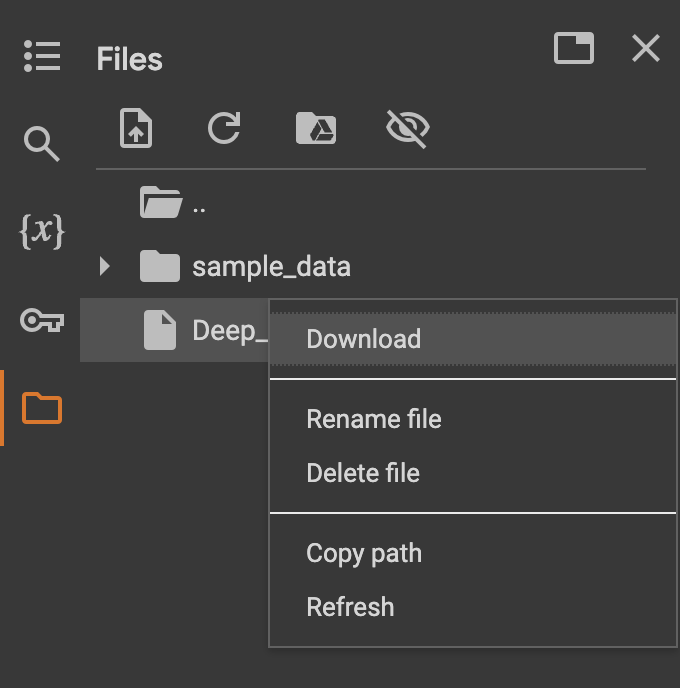



You can also visualize the top results here:

In [ ]:
# @title
import pandas as pd
results = pd.read_csv(search_query.replace(' ', '_')+'.csv')
results

In [ ]:
# @title Rank vs Citations

import plotly.express as px
view = results.reset_index().copy()

# Function to truncate and add line breaks to long titles
def shorten_title(title, max_length=60):
    words = title.split()
    shortened_lines = []
    current_line = []

    # Add words to the current line until max_length is exceeded
    for word in words:
        if len(' '.join(current_line + [word])) <= max_length:
            current_line.append(word)
        else:
            shortened_lines.append(' '.join(current_line))
            current_line = [word]

    # Add the last line
    if current_line:
        shortened_lines.append(' '.join(current_line))

    return '<br>'.join(shortened_lines)


# Apply this function to the 'Title' column and create a new column for the shortened titles
view['Short_Title'] = view['Title'].apply(shorten_title)

# Now use 'Short_Title' for hover_name
fig = px.scatter(view,
                 x='Rank',
                 y='Citations',
                 title='Number of Citations vs Google Scholar Rank',
                 hover_name='Short_Title',
                 hover_data=['Rank', 'Author', 'Citations', 'Year', 'Publisher', 'Venue', 'cit/year']
)
fig.show()

In [ ]:
# @title
# Now use 'Short_Title' for hover_name
fig = px.scatter(view,
                 x='Rank',
                 y='cit/year',
                 title='Number of Citations/Year vs Google Scholar Rank',
                 hover_name='Short_Title',
                 hover_data=['Rank', 'Author', 'Citations', 'Year', 'Publisher', 'Venue', 'cit/year']
)
fig.show()